In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load, encoding="utf-8")
trial_data = pd.read_csv(clinical_trial_data_to_load, encoding ="utf-8")
trial_data.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


In [2]:
# Checking for column names in case there is a line break in the name of column :"Mouse ID", 
# before defining the merge On=
trial_data.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [3]:
# Combine the data into a single dataset
combined = pd.merge(trial_data, mouse_data, on="Mouse ID", how="outer")
# Display the data table for preview
combined.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin


In [4]:
#Checking for weird values in every cell, by checking every column, to drop incomplete data
# combined["Mouse ID"].unique()
# combined["Timepoint"].unique()
# combined["Metastatic Sites"].unique()
# combined["Drug"].unique()

# ALL data is clean. Review lines are commented out for no estorbo

## Tumor Response to Treatment

In [5]:
combined.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin


In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
mean_tumor_volume = pd.DataFrame(combined.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"])
mean_tumor_volume = mean_tumor_volume.reset_index(drop=False)
mean_tumor_volume.head(3)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
TMVData_stand_err = pd.DataFrame(combined.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])
TMVData_stand_err = TMVData_stand_err.reset_index(drop=False)
TMVData_stand_err.head(4)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617


In [8]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
mungedTMV_mean = mean_tumor_volume.set_index(["Timepoint", "Drug"], drop=True).unstack("Drug")

# Need to drop the multi-index level "Tumor Volume mm3" created when unstacking above 
# because it interfers later when doing the plot and choosing columns
mungedTMV_mean = mungedTMV_mean.droplevel(0, axis=1)

mungedTMV_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Need to drop the multi-index level "Tumor Volume mm3" created when unstacking below 
# because it interfers later when doing the plot and choosing columns
mungedTMV_error = TMVData_stand_err.set_index(["Timepoint", "Drug"], drop=True).unstack("Drug")
mungedTMV_error = mungedTMV_error.droplevel(0, axis =1)
mungedTMV_error

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [10]:
mungedTMV_error.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [11]:
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment
# Generate the Plot (with Error Bars)
# Show the Figure
# Save the Figure

In [12]:
x_axis = np.arange(0,50,5)

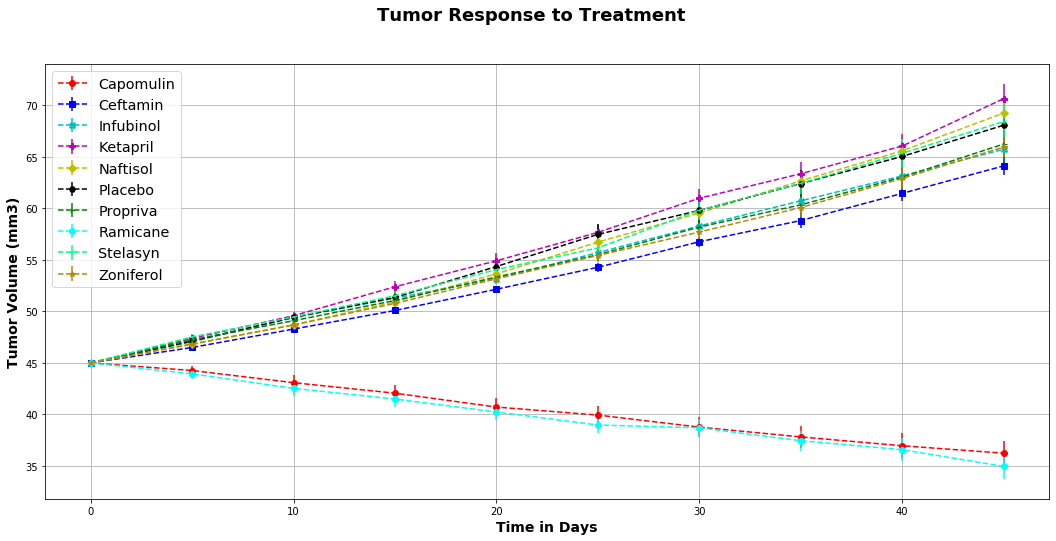

In [13]:
fig, ax = plt.subplots()
fig.suptitle("Tumor Response to Treatment", fontsize=18, fontweight="bold")

plt.gcf().set_size_inches(18, 8)

ax.errorbar(x_axis, mungedTMV_mean["Capomulin"], yerr=mungedTMV_error["Capomulin"], fmt="o", label="Capomulin", color="r", ls="dashed")
ax.errorbar(x_axis, mungedTMV_mean["Ceftamin"], yerr=mungedTMV_error["Ceftamin"], fmt="s", label="Ceftamin", color="b", ls="dashed")
ax.errorbar(x_axis, mungedTMV_mean["Infubinol"], yerr=mungedTMV_error["Infubinol"], fmt="X", label="Infubinol", color="c", ls="dashed")
ax.errorbar(x_axis, mungedTMV_mean["Ketapril"], yerr=mungedTMV_error["Ketapril"], fmt="P", label="Ketapril", color="m", ls="dashed")
ax.errorbar(x_axis, mungedTMV_mean["Naftisol"], yerr=mungedTMV_error["Naftisol"], fmt="D", label="Naftisol", color="y", ls="dashed")
ax.errorbar(x_axis, mungedTMV_mean["Placebo"], yerr=mungedTMV_error["Placebo"], fmt="H", label="Placebo", color="k", ls="dashed")
ax.errorbar(x_axis, mungedTMV_mean["Propriva"], yerr=mungedTMV_error["Propriva"], fmt="4", label="Propriva", color="g", ls="dashed")
ax.errorbar(x_axis, mungedTMV_mean["Ramicane"], yerr=mungedTMV_error["Ramicane"], fmt="8", label="Ramicane", color="cyan", ls="dashed")
ax.errorbar(x_axis, mungedTMV_mean["Stelasyn"], yerr=mungedTMV_error["Stelasyn"], fmt="3", label="Stelasyn", color="springgreen", ls="dashed")
ax.errorbar(x_axis, mungedTMV_mean["Zoniferol"], yerr=mungedTMV_error["Zoniferol"], fmt="*", label="Zoniferol", color="darkgoldenrod", ls="dashed")

plt.ylim = (15,80)
plt.xlim =(0,50)

plt.xlabel("Time in Days", fontsize=14, fontweight="bold")
plt.ylabel("Tumor Volume (mm3)", fontsize=14, fontweight="bold")
plt.legend(loc="best", fontsize="x-large")
plt.grid()
plt.savefig("../Pymaceuticals/Images/TumorResponseTreatment.png")
plt.show()

## Metastatic Response to Treatment

In [14]:
combined.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin


In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
mean_metastatic = pd.DataFrame(combined.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"])
mean_metastatic = mean_metastatic.reset_index(drop=False)
mean_metastatic.head(3)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.00
1,Capomulin,5,0.16
2,Capomulin,10,0.32


In [16]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
error_metastatic = pd.DataFrame(combined.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"])
error_metastatic = error_metastatic.reset_index(drop=False)
error_metastatic.head(3)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433


In [17]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Need to drop the multi-index level "Metastatic Sites" created when unstacking below
# because it interfers later when doing the plot and choosing columns
munged_mean_metastatic = mean_metastatic.set_index(["Drug","Timepoint"]).unstack("Drug")
munged_mean_metastatic = munged_mean_metastatic.droplevel(0, axis=1)
munged_mean_metastatic.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [18]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Need to drop the multi-index level "Metastatic Sites" created when unstacking below
# because it interfers later when doing the plot and choosing columns
munged_error_metastatic = error_metastatic.set_index(["Drug","Timepoint"]).unstack("Drug")
munged_error_metastatic = munged_error_metastatic.droplevel(0, axis=1)
munged_error_metastatic.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [19]:
x_axis = np.arange(0,50,5)

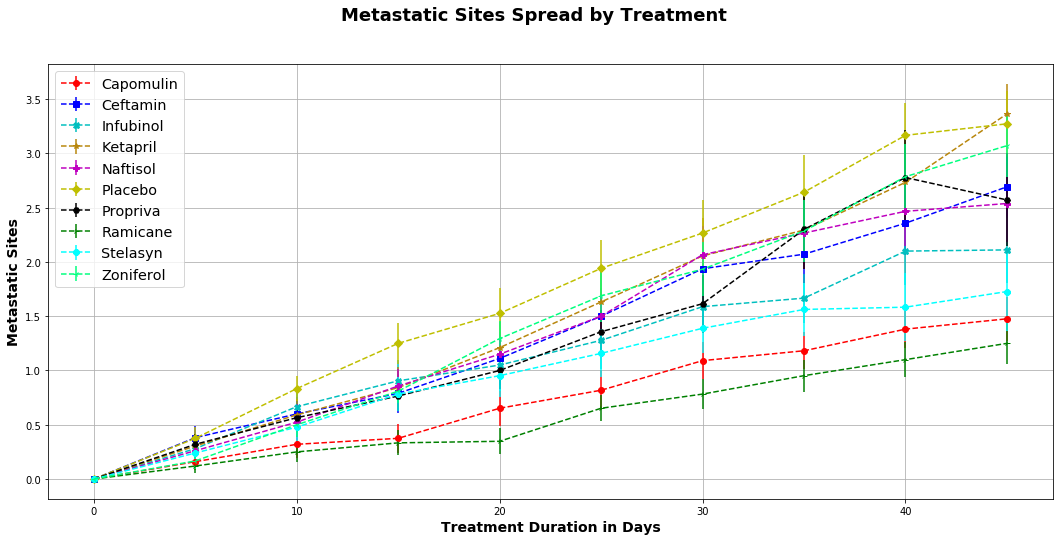

In [20]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
fig, ax = plt.subplots()
fig.suptitle("Metastatic Sites Spread by Treatment", fontsize=18, fontweight="bold")

plt.gcf().set_size_inches(18,8)

ax.errorbar(x_axis, munged_mean_metastatic["Capomulin"], yerr=munged_error_metastatic["Capomulin"], fmt="o", label="Capomulin", color= "r", ls="dashed")
ax.errorbar(x_axis, munged_mean_metastatic["Ceftamin"], yerr=munged_error_metastatic["Ceftamin"], fmt="s", label="Ceftamin", color="b", ls="dashed")
ax.errorbar(x_axis, munged_mean_metastatic["Infubinol"], yerr=munged_error_metastatic["Infubinol"], fmt="X", label="Infubinol", color="c", ls="dashed")
ax.errorbar(x_axis, munged_mean_metastatic["Ketapril"], yerr=munged_error_metastatic["Ketapril"], fmt="*", label="Ketapril", color="darkgoldenrod", ls="dashed")
ax.errorbar(x_axis, munged_mean_metastatic["Naftisol"], yerr=munged_error_metastatic["Naftisol"], fmt="P", label="Naftisol", color="m", ls="dashed")
ax.errorbar(x_axis, munged_mean_metastatic["Placebo"], yerr=munged_error_metastatic["Placebo"], fmt="D", label="Placebo", color="y", ls="dashed")
ax.errorbar(x_axis, munged_mean_metastatic["Propriva"], yerr=munged_error_metastatic["Propriva"], fmt="H", label="Propriva", color="k", ls="dashed")
ax.errorbar(x_axis, munged_mean_metastatic["Ramicane"], yerr=munged_error_metastatic["Ramicane"], fmt="4", label="Ramicane", color="g", ls="dashed")
ax.errorbar(x_axis, munged_mean_metastatic["Stelasyn"], yerr=munged_error_metastatic["Stelasyn"], fmt="8", label="Stelasyn", color="cyan", ls="dashed")
ax.errorbar(x_axis, munged_mean_metastatic["Zoniferol"], yerr=munged_error_metastatic["Zoniferol"], fmt="3", label="Zoniferol", color="springgreen", ls="dashed")


plt.xlabel("Treatment Duration in Days", fontsize=14, fontweight="bold")
plt.ylabel("Metastatic Sites", fontsize=14, fontweight="bold")
plt.legend(loc="best", fontsize="x-large")
plt.grid()
plt.savefig("../Pymaceuticals/Images/MetastaticSpreadbyTreatment.png")
plt.show()

In [21]:
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Survival Rates

In [22]:
combined["Mouse ID"].count()

1906

In [23]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

mice_grouped = pd.DataFrame(combined.groupby(["Drug", "Timepoint"]).count()["Mouse ID"])
mice_grouped = mice_grouped.reset_index(drop=False)

# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame

munged_mice_survival = mice_grouped.set_index(["Drug", "Timepoint"]).unstack("Drug")
munged_mice_survival = munged_mice_survival.droplevel(0,axis=1)
munged_mice_survival.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [24]:
#y_Capomulin = (munged_mice_survival["Capomulin"]/munged_mice_survival.loc[0, "Ceftamin"])*100
#y_Capomulin

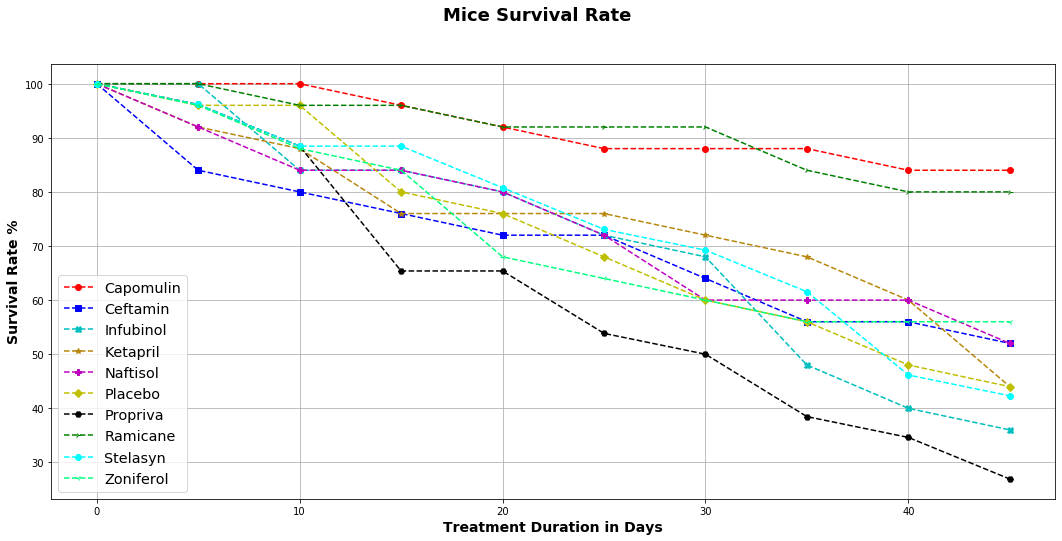

In [25]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
fig, ax = plt.subplots()
fig.suptitle("Mice Survival Rate",fontsize=18, fontweight="bold")

plt.gcf().set_size_inches(18,8)


plt.plot((munged_mice_survival["Capomulin"]/munged_mice_survival.loc[0, "Capomulin"])*100,label="Capomulin", color= "r", ls="dashed", marker="o")
plt.plot((munged_mice_survival["Ceftamin"]/munged_mice_survival.loc[0, "Ceftamin"])*100,label="Ceftamin", color= "b", ls="dashed", marker="s")
plt.plot((munged_mice_survival["Infubinol"]/munged_mice_survival.loc[0, "Infubinol"])*100,label="Infubinol", color= "c", ls="dashed", marker="X")
plt.plot((munged_mice_survival["Ketapril"]/munged_mice_survival.loc[0, "Ketapril"])*100,label="Ketapril", color= "darkgoldenrod", ls="dashed", marker="*")
plt.plot((munged_mice_survival["Naftisol"]/munged_mice_survival.loc[0, "Naftisol"])*100,label="Naftisol", color= "m", ls="dashed", marker="P")
plt.plot((munged_mice_survival["Placebo"]/munged_mice_survival.loc[0, "Placebo"])*100,label="Placebo", color= "y", ls="dashed", marker="D")
plt.plot((munged_mice_survival["Propriva"]/munged_mice_survival.loc[0, "Propriva"])*100,label="Propriva", color= "k", ls="dashed", marker="H")
plt.plot((munged_mice_survival["Ramicane"]/munged_mice_survival.loc[0, "Ramicane"])*100,label="Ramicane", color= "g", ls="dashed", marker="4")
plt.plot((munged_mice_survival["Stelasyn"]/munged_mice_survival.loc[0, "Stelasyn"])*100,label="Stelasyn", color= "cyan", ls="dashed", marker="8")
plt.plot((munged_mice_survival["Zoniferol"]/munged_mice_survival.loc[0, "Zoniferol"])*100,label="Zoniferol", color= "springgreen", ls="dashed", marker="3")

plt.xlabel("Treatment Duration in Days", fontsize=14, fontweight="bold")
plt.ylabel("Survival Rate %", fontsize=14, fontweight="bold")
plt.legend(loc="best", fontsize="x-large")
plt.grid()
plt.savefig("../Pymaceuticals/Images/MiceSurvivalbyTreatment.png")
plt.show()

## Summary Bar Graph

In [26]:
mungedTMV_mean.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881


In [27]:
# Calculate the percent changes for each drug
# Display the data to confirm
change = ((mungedTMV_mean.iloc[-1] - mungedTMV_mean.iloc[0]) / mungedTMV_mean.iloc[0])*100
change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [28]:
change = change.sort_values(ascending=True)
change

Drug
Ramicane    -22.320900
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Zoniferol    46.579751
Propriva     47.241175
Placebo      51.297960
Stelasyn     52.085134
Naftisol     53.923347
Ketapril     57.028795
dtype: float64

In [29]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (change["Ramicane"], change["Capomulin"], change["Ceftamin"], change["Infubinol"], change["Zoniferol"], change["Propriva"], change["Placebo"], change["Stelasyn"], change["Naftisol"], change["Ketapril"])
pct_changes

(-22.32090046276666,
 -19.475302667894155,
 42.516491855897414,
 46.12347172785184,
 46.57975086509522,
 47.24117486320634,
 51.29796048315153,
 52.085134287898995,
 53.923347134769195,
 57.02879468660604)

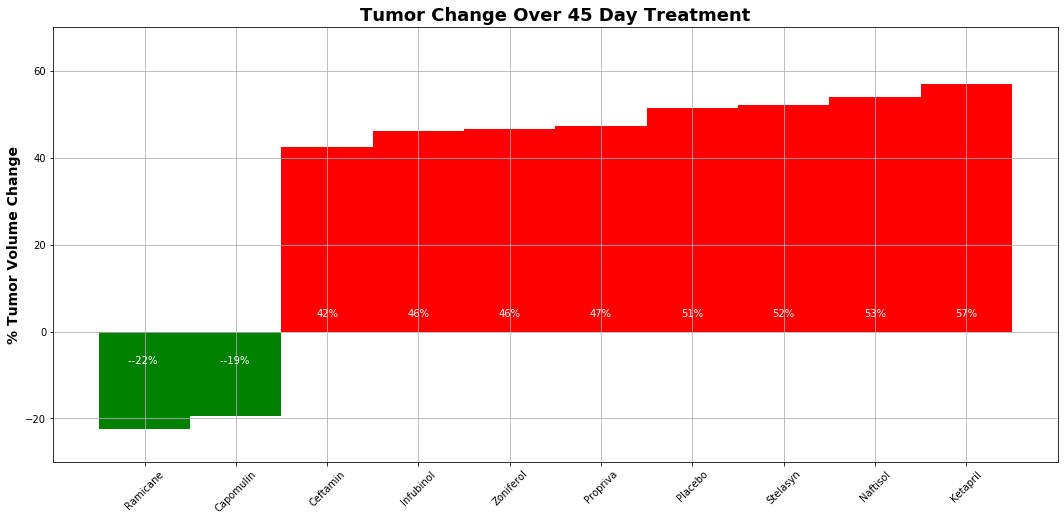

In [30]:
# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
x_axis = np.arange(len(pct_changes))
width = 1
rectsPass = ax.bar(x_axis[0:2], pct_changes[0:2], width, color = "green")
rectsFail = ax.bar(x_axis[2:], pct_changes[2:], width, color = "red")

plt.gcf().set_size_inches(18,8)

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change", fontsize=14, fontweight="bold")
ax.set_title("Tumor Change Over 45 Day Treatment", fontsize=18, fontweight="bold")
ax.set_xticks(x_axis)
ax.set_xticklabels(("Ramicane", "Capomulin", "Ceftamin", "Infubinol", "Zoniferol", "Propriva", "Placebo", "Stelasyn", "Naftisol", "Ketapril"), rotation=45)
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("../Pymaceuticals/Images/TumorChange.png")

# Show the Figure
fig.show()